Data Setup & Preprocessing

In [59]:
import pandas as pd

# Load the dataset
df = pd.read_csv("GlobalWeatherRepository.csv")
print("Shape:", df.shape)
df.head()

Shape: (60218, 41)


,country,location_name,latitude,longitude,timezone,last_updated_epoch,last_updated,temperature_celsius,temperature_fahrenheit,condition_text,...,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,sunrise,sunset,moonrise,moonset,moon_phase,moon_illumination
0,Afghanistan,Kabul,34.52,69.18,Asia/Kabul,1715849100,2024-05-16 13:15,26.6,79.8,Partly Cloudy,...,8.4,26.6,1,1,04:50 AM,06:50 PM,12:12 PM,01:11 AM,Waxing Gibbous,55
1,Albania,Tirana,41.33,19.82,Europe/Tirane,1715849100,2024-05-16 10:45,19.0,66.2,Partly cloudy,...,1.1,2.0,1,1,05:21 AM,07:54 PM,12:58 PM,02:14 AM,Waxing Gibbous,55
2,Algeria,Algiers,36.76,3.05,Africa/Algiers,1715849100,2024-05-16 09:45,23.0,73.4,Sunny,...,10.4,18.4,1,1,05:40 AM,07:50 PM,01:15 PM,02:14 AM,Waxing Gibbous,55
3,Andorra,Andorra La Vella,42.50,1.52,Europe/Andorra,1715849100,2024-05-16 10:45,6.3,43.3,Light drizzle,...,0.7,0.9,1,1,06:31 AM,09:11 PM,02:12 PM,03:31 AM,Waxing Gibbous,55
4,Angola,Luanda,-8.84,13.23,Africa/Luanda,1715849100,2024-05-16 09:45,26.0,78.8,Partly cloudy,...,183.4,262.3,5,10,06:12 AM,05:55 PM,01:17 PM,12:38 AM,Waxing Gibbous,55


In [60]:

from sklearn.preprocessing import StandardScaler  # or MinMaxScaler

# Load the dataset
df = pd.read_csv("GlobalWeatherRepository.csv")
print("Original Shape:", df.shape)

# Overview of missing data
missing = df.isnull().sum()

# Drop columns with >40% missing values
threshold = 0.4
df = df.loc[:, df.isnull().mean() < threshold]

# Identify numeric and categorical columns
num_cols = df.select_dtypes(include='number').columns
cat_cols = df.select_dtypes(include='object').columns

# Fill missing values
df[num_cols] = df[num_cols].fillna(df[num_cols].median())
df[cat_cols] = df[cat_cols].fillna(df[cat_cols].mode().iloc[0])

# Remove outliers using IQR method
Q1 = df[num_cols].quantile(0.25)
Q3 = df[num_cols].quantile(0.75)
IQR = Q3 - Q1
df_no_outliers = df[~((df[num_cols] < (Q1 - 1.5 * IQR)) | (df[num_cols] > (Q3 + 1.5 * IQR))).any(axis=1)]
print("Shape after removing outliers:", df_no_outliers.shape)

# Normalize numeric columns
scaler = StandardScaler()  # or MinMaxScaler()
df_scaled = df_no_outliers.copy()
df_scaled[num_cols] = scaler.fit_transform(df_no_outliers[num_cols])

# Print basic info and normalized data
print("\nDataFrame Info:")
df_scaled.info()

print("\nSummary Statistics:")
print(df_scaled.describe())

print("\nNormalized Data (first 10 rows):")
print(df_scaled[num_cols].head(10))

# Optional: check remaining missing values
missing = df.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)
print("\nRemaining Missing Values:\n", missing)


Original Shape: (60218, 41)
Shape after removing outliers: (25425, 41)

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
Index: 25425 entries, 0 to 60217
Data columns (total 41 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       25425 non-null  object 
 1   location_name                 25425 non-null  object 
 2   latitude                      25425 non-null  float64
 3   longitude                     25425 non-null  float64
 4   timezone                      25425 non-null  object 
 5   last_updated_epoch            25425 non-null  float64
 6   last_updated                  25425 non-null  object 
 7   temperature_celsius           25425 non-null  float64
 8   temperature_fahrenheit        25425 non-null  float64
 9   condition_text                25425 non-null  object 
 10  wind_mph                      25425 non-null  float64
 11  wind_kph                      25425 

In [61]:
# Basic summary of key features
features = ['temperature_celsius', 'precip_mm', 'humidity', 'wind_kph', 'pressure_mb']
df_scaled[features].describe()


,temperature_celsius,precip_mm,humidity,wind_kph,pressure_mb
count,2.542500e+04,2.542500e+04,2.542500e+04,2.542500e+04,2.542500e+04
mean,-8.719344e-17,-1.117865e-17,-3.577167e-17,-1.833298e-16,-9.932228e-15
std,1.000020e+00,1.000020e+00,1.000020e+00,1.000020e+00,1.000020e+00
min,-3.068119e+00,-3.981607e-01,-2.404597e+00,-1.305956e+00,-2.796826e+00
25%,-4.873556e-01,-3.981607e-01,-7.738318e-01,-8.277179e-01,-5.861169e-01
50%,2.210892e-01,-3.981607e-01,1.273808e-01,-1.634977e-01,-3.343960e-02
75%,6.512164e-01,-3.981607e-01,8.140190e-01,7.531262e-01,5.192377e-01
max,2.738598e+00,4.630055e+00,1.801061e+00,2.998190e+00,2.729947e+00


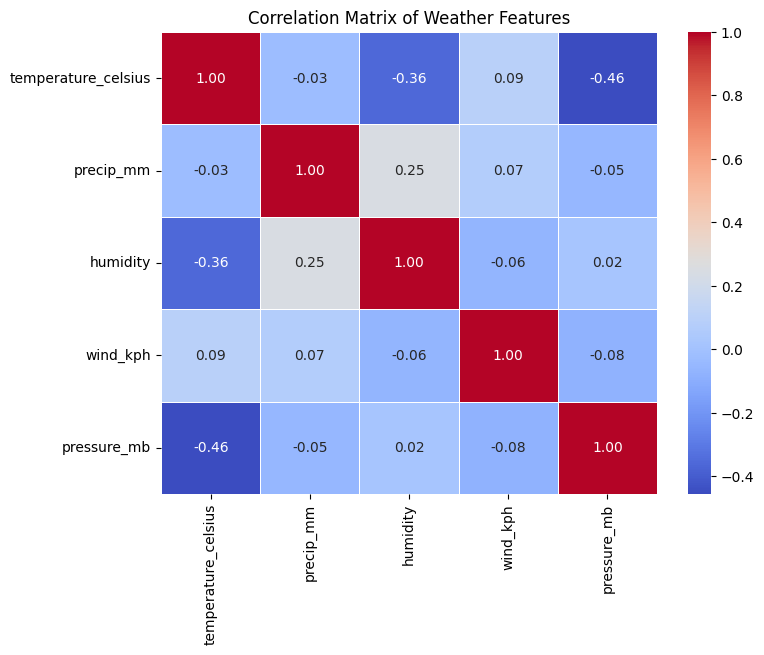

In [62]:
df_scaled[['temperature_celsius', 'precip_mm', 'humidity', 'wind_kph', 'pressure_mb']].describe()
import seaborn as sns
import matplotlib.pyplot as plt

# Focused numeric features
features = ['temperature_celsius', 'precip_mm', 'humidity', 'wind_kph', 'pressure_mb']
corr = df_scaled[features].corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Weather Features")
plt.show()


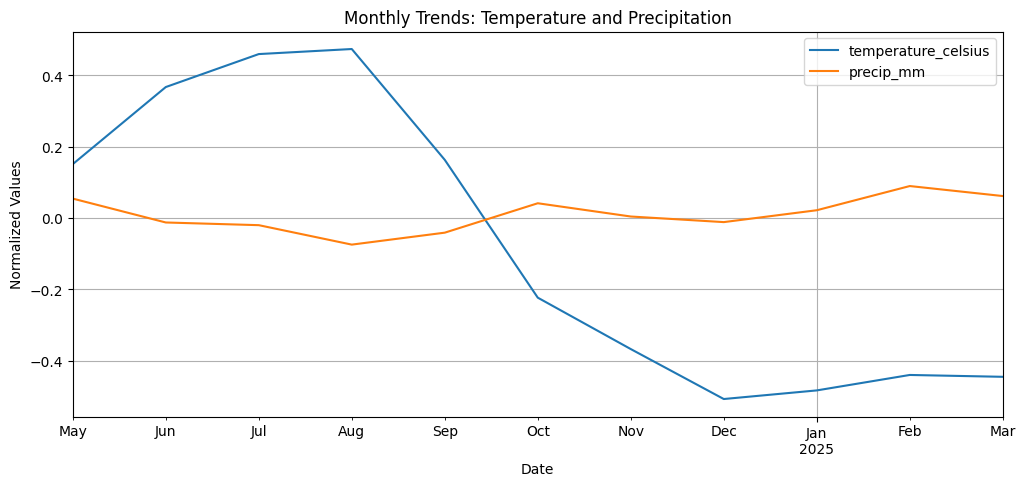

In [63]:
# Ensure datetime
df_scaled['last_updated'] = pd.to_datetime(df_scaled['last_updated'])
df_time = df_scaled.set_index('last_updated')

# Monthly averages
monthly_trends = df_time[features].resample('M').mean()
monthly_trends[['temperature_celsius', 'precip_mm']].plot(figsize=(12, 5), grid=True)
plt.title("Monthly Trends: Temperature and Precipitation")
plt.xlabel("Date")
plt.ylabel("Normalized Values")
plt.show()



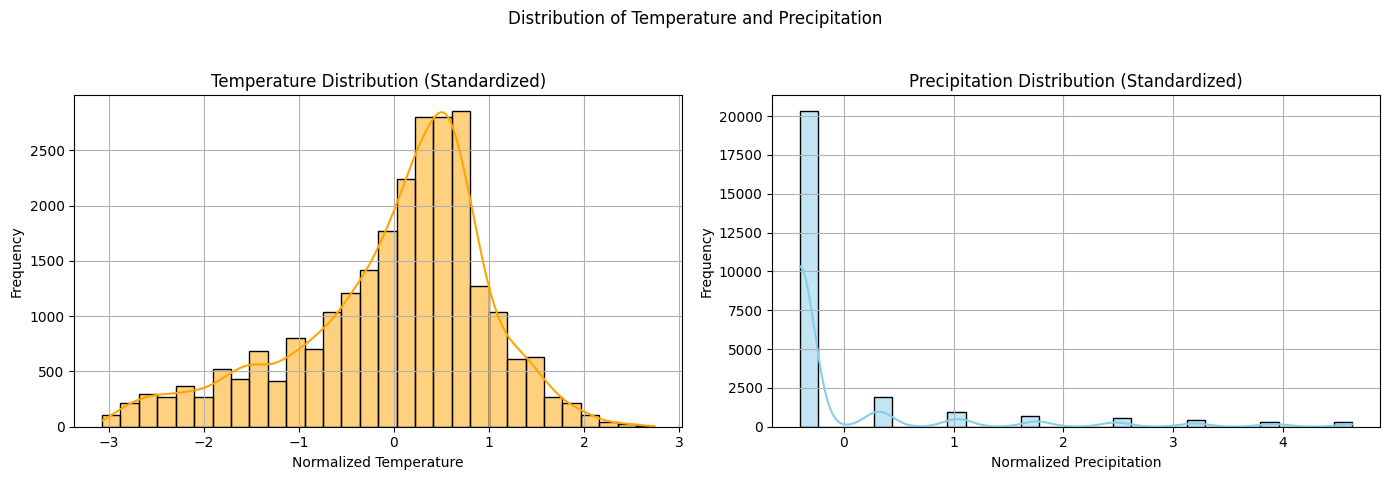

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a 1x2 subplot
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Temperature distribution
sns.histplot(df_scaled['temperature_celsius'], bins=30, kde=True, color='orange', ax=axes[0])
axes[0].set_title("Temperature Distribution (Standardized)")
axes[0].set_xlabel("Normalized Temperature")
axes[0].set_ylabel("Frequency")
axes[0].grid(True)

# Precipitation distribution
sns.histplot(df_scaled['precip_mm'], bins=30, kde=True, color='skyblue', ax=axes[1])
axes[1].set_title("Precipitation Distribution (Standardized)")
axes[1].set_xlabel("Normalized Precipitation")
axes[1].set_ylabel("Frequency")
axes[1].grid(True)

# Overall layout
plt.suptitle("Distribution of Temperature and Precipitation")
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()



Model Building


📈 Forecasting 'temperature_celsius' with Prophet...



15:58:42 - cmdstanpy - INFO - Chain [1] start processing
15:58:46 - cmdstanpy - INFO - Chain [1] done processing


🔍 Evaluation for 'temperature_celsius':
MAE:  0.9616
RMSE: 1.1170
MAPE: 391.12%
R²:   -0.0117


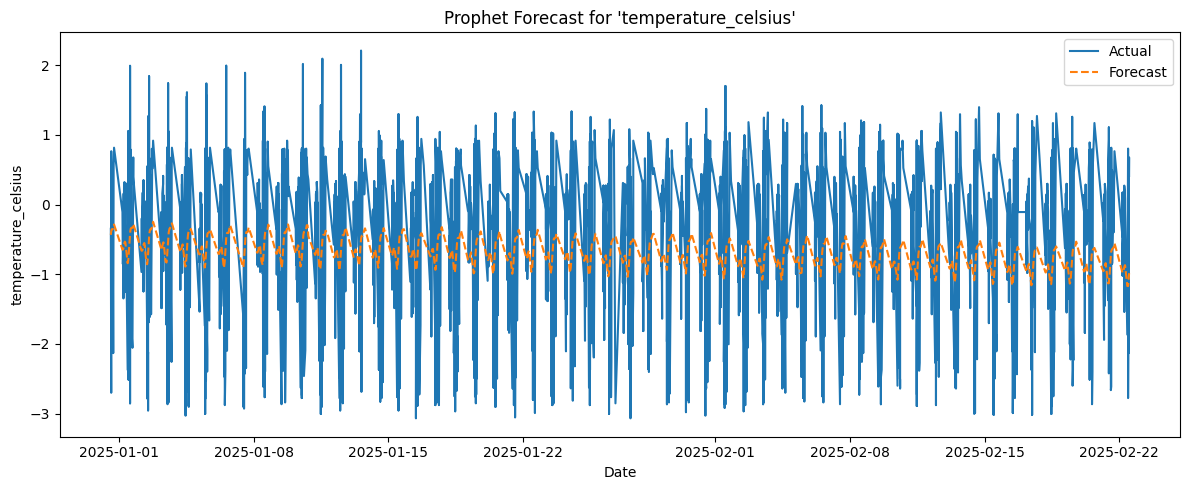


📈 Forecasting 'precip_mm' with Prophet...



15:58:50 - cmdstanpy - INFO - Chain [1] start processing
15:58:53 - cmdstanpy - INFO - Chain [1] done processing


🔍 Evaluation for 'precip_mm':
MAE:  0.6642
RMSE: 1.0657
MAPE: 98.81%
R²:   -0.0053


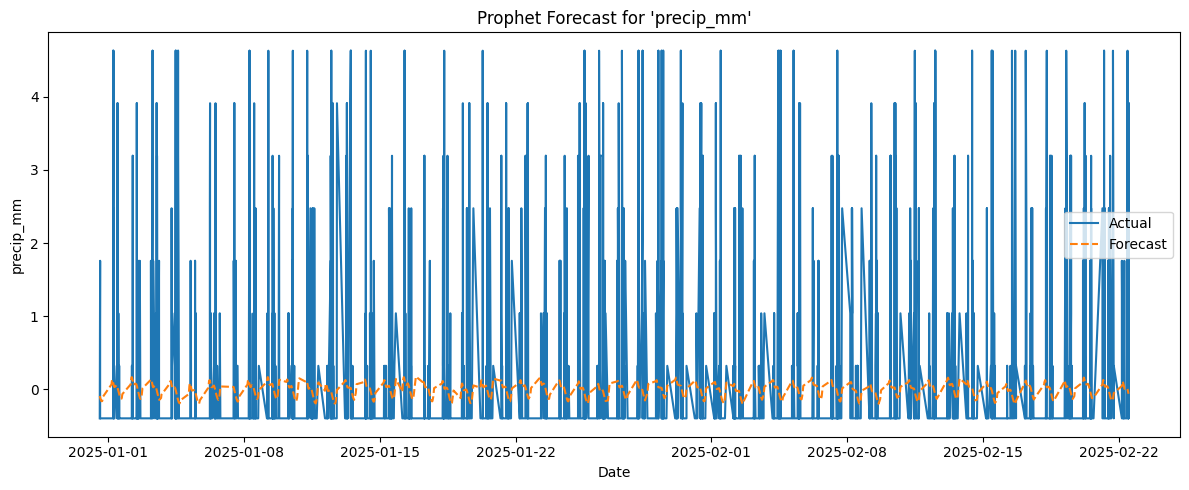

In [68]:
import pandas as pd
import numpy as np
from prophet import Prophet
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# 🧹 Step 1: Prepare datetime column
df_scaled['ds'] = pd.to_datetime(df_scaled['last_updated'])
df_scaled = df_scaled.sort_values('ds')

# ⚙️ Step 2: Prophet function
def run_prophet_forecast(df, target_col, scaler=None, test_size_ratio=0.2):
    print(f"\n📈 Forecasting '{target_col}' with Prophet...\n")

    # Step 1: Create Prophet DataFrame
    df_prophet = df[['ds', target_col]].rename(columns={target_col: 'y'})

    # Step 2: Scale (optional)
    if scaler:
        df_prophet['y'] = scaler.transform(df[[target_col]])

    # Step 3: Train-test split
    split_index = int(len(df_prophet) * (1 - test_size_ratio))
    train = df_prophet.iloc[:split_index]
    test = df_prophet.iloc[split_index:]

    # Step 4: Fit Prophet
    model = Prophet()
    model.fit(train)

    # Step 5: Make future dataframe & forecast
    future = model.make_future_dataframe(periods=len(test), freq='15min')
    forecast = model.predict(future)

    # Step 6: Align predictions with actuals using merge
    merged = pd.merge(test, forecast[['ds', 'yhat']], on='ds', how='inner')
    true = merged['y']
    predicted = merged['yhat']

    # Step 7: Evaluation (metrics on scaled or unscaled depending on step 8)
    mae = mean_absolute_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    mape = np.mean(np.abs((true - predicted) / (true + 1e-8))) * 100
    r2 = r2_score(true, predicted)

    # Step 8: Inverse transform if scaled
    if scaler:
        true = scaler.inverse_transform(np.array(true).reshape(-1, 1)).flatten()
        predicted = scaler.inverse_transform(np.array(predicted).reshape(-1, 1)).flatten()

    # Step 9: Print results
    print(f"🔍 Evaluation for '{target_col}':")
    print(f"MAE:  {mae:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"MAPE: {mape:.2f}%")
    print(f"R²:   {r2:.4f}")

    # Step 10: Plot results
    plt.figure(figsize=(12, 5))
    plt.plot(merged['ds'], true, label='Actual')
    plt.plot(merged['ds'], predicted, label='Forecast', linestyle='--')
    plt.title(f"Prophet Forecast for '{target_col}'")
    plt.xlabel("Date")
    plt.ylabel(target_col)
    plt.legend()
    plt.tight_layout()
    plt.show()

# 🧪 Step 3: Scale target variables
scaler_temp = StandardScaler()
scaler_precip = StandardScaler()
df_scaled['temperature_celsius'] = scaler_temp.fit_transform(df_scaled[['temperature_celsius']])
df_scaled['precip_mm'] = scaler_precip.fit_transform(df_scaled[['precip_mm']])

# ✅ Step 4: Run Prophet forecasts
run_prophet_forecast(df_scaled, 'temperature_celsius', scaler_temp)
run_prophet_forecast(df_scaled, 'precip_mm', scaler_precip)


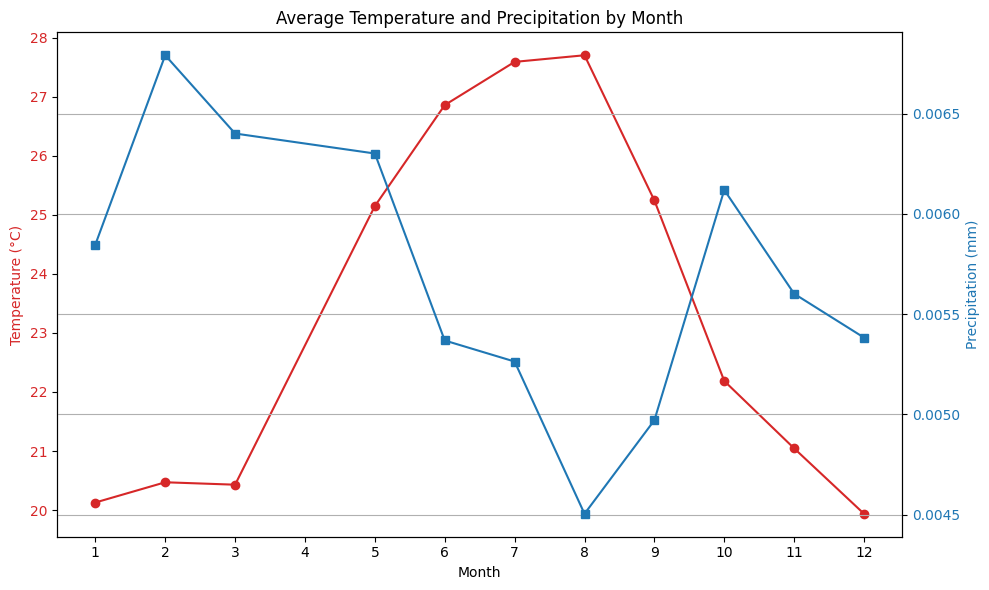

In [69]:
import matplotlib.pyplot as plt

# Prepare data
monthly_data = df_no_outliers.copy()
monthly_data['last_updated'] = pd.to_datetime(monthly_data['last_updated'])
monthly_data['month'] = monthly_data['last_updated'].dt.month

# Group by month
monthly_avg = monthly_data.groupby('month').agg({
    'temperature_celsius': 'mean',
    'precip_mm': 'mean'
})

# Plot with dual y-axis
fig, ax1 = plt.subplots(figsize=(10, 6))

color1 = 'tab:red'
ax1.set_xlabel('Month')
ax1.set_ylabel('Temperature (°C)', color=color1)
ax1.plot(monthly_avg.index, monthly_avg['temperature_celsius'], marker='o', color=color1, label='Temperature')
ax1.tick_params(axis='y', labelcolor=color1)

# Second y-axis for precipitation
ax2 = ax1.twinx()
color2 = 'tab:blue'
ax2.set_ylabel('Precipitation (mm)', color=color2)
ax2.plot(monthly_avg.index, monthly_avg['precip_mm'], marker='s', color=color2, label='Precipitation')
ax2.tick_params(axis='y', labelcolor=color2)

plt.title("Average Temperature and Precipitation by Month")
plt.xticks(range(1,13))
fig.tight_layout()
plt.grid(True)
plt.show()


Advanced EDA

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prophet import Prophet
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 📦 Load and prepare your data (assume df_scaled is preloaded)
df_scaled['ds'] = pd.to_datetime(df_scaled['last_updated'])
df_scaled = df_scaled.sort_values('ds')

# ----------------------------------------
# ⚙️ Prophet Forecast Function
# ----------------------------------------
def run_prophet_forecast(df, target_col, scaler=None, test_size_ratio=0.2):
    print(f"\n📈 Forecasting '{target_col}' with Prophet...\n")

    # Step 1: Prepare data
    df_prophet = df[['ds', target_col]].rename(columns={target_col: 'y'})

    # Step 2: Scale
    if scaler:
        df_prophet['y'] = scaler.transform(df_prophet[['y']])

    # Step 3: Train-test split
    split_index = int(len(df_prophet) * (1 - test_size_ratio))
    train = df_prophet.iloc[:split_index]
    test = df_prophet.iloc[split_index:]

    # Step 4: Fit model
    model = Prophet()
    model.fit(train)

    # Step 5: Forecast
    future = model.make_future_dataframe(periods=len(test), freq='15min')
    forecast = model.predict(future)

    # Step 6: Align with actuals
    merged = pd.merge(test, forecast[['ds', 'yhat']], on='ds', how='inner')
    true = merged['y']
    predicted = merged['yhat']

    # Step 7: Evaluate
    mae = mean_absolute_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    mape = np.mean(np.abs((true - predicted) / (true + 1e-8))) * 100
    r2 = r2_score(true, predicted)

    if scaler:
        true = scaler.inverse_transform(np.array(true).reshape(-1, 1)).flatten()
        predicted = scaler.inverse_transform(np.array(predicted).reshape(-1, 1)).flatten()

    print(f"🔍 Evaluation for '{target_col}':")
    print(f"MAE:  {mae:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"MAPE: {mape:.2f}%")
    print(f"R²:   {r2:.4f}")

    # Step 8: Plot
    plt.figure(figsize=(12, 5))
    plt.plot(merged['ds'], true, label='Actual')
    plt.plot(merged['ds'], predicted, label='Forecast', linestyle='--')
    plt.title(f"Prophet Forecast for '{target_col}'")
    plt.xlabel("Date")
    plt.ylabel(target_col)
    plt.legend()
    plt.tight_layout()
    plt.show()

# ----------------------------------------
# 🧪 Anomaly Detection Methods
# ----------------------------------------

# 1. Isolation Forest
def detect_anomalies_isolation_forest(df, col):
    model = IsolationForest(contamination=0.01, random_state=42)
    df[f'anomaly_iforest_{col}'] = model.fit_predict(df[[col]]) == -1
    return df

# 2. Z-score
def detect_anomalies_zscore(df, col, threshold=3):
    mean = df[col].mean()
    std = df[col].std()
    z_scores = (df[col] - mean) / std
    df[f'anomaly_z_{col}'] = np.abs(z_scores) > threshold
    return df

# 3. IQR
def detect_anomalies_iqr(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df[f'anomaly_iqr_{col}'] = (df[col] < lower) | (df[col] > upper)
    return df

# ----------------------------------------
# 📊 Combined Anomaly Plot
# ----------------------------------------
def plot_all_anomalies_together(df, col):
    plt.figure(figsize=(14, 5))
    
    # Base line
    plt.plot(df['ds'], df[col], label='Normal', color='gray', alpha=0.4)

    # Isolation Forest
    plt.scatter(df[df[f'anomaly_iforest_{col}']]['ds'],
                df[df[f'anomaly_iforest_{col}']][col],
                color='red', label='Isolation Forest', s=50, marker='x')

    # Z-score
    plt.scatter(df[df[f'anomaly_z_{col}']]['ds'],
                df[df[f'anomaly_z_{col}']][col],
                color='blue', label='Z-score', s=50, marker='o')

    # IQR
    plt.scatter(df[df[f'anomaly_iqr_{col}']]['ds'],
                df[df[f'anomaly_iqr_{col}']][col],
                color='green', label='IQR', s=50, marker='^')

    plt.title(f"Combined Anomaly Detection: {col}")
    plt.xlabel("Date")
    plt.ylabel(col)
    plt.legend()
    plt.tight_layout()
    plt.show()

# ----------------------------------------
# ✅ Scale Features
# ----------------------------------------
scaler_temp = StandardScaler()
scaler_precip = StandardScaler()

df_scaled['temperature_celsius'] = scaler_temp.fit_transform(df_scaled[['temperature_celsius']])
df_scaled['precip_mm'] = scaler_precip.fit_transform(df_scaled[['precip_mm']])

# ----------------------------------------
# ✅ Run Forecasts
# ----------------------------------------
run_prophet_forecast(df_scaled.copy(), 'temperature_celsius', scaler_temp)
run_prophet_forecast(df_scaled.copy(), 'precip_mm', scaler_precip)

# ----------------------------------------
# ✅ Run Anomaly Detection & Plotting
# ----------------------------------------
df_anomalies = df_scaled.copy()
numeric_cols = ['temperature_celsius', 'precip_mm']

for col in numeric_cols:
    df_anomalies = detect_anomalies_isolation_forest(df_anomalies, col)
    df_anomalies = detect_anomalies_zscore(df_anomalies, col)
    df_anomalies = detect_anomalies_iqr(df_anomalies, col)

    # 📊 Plot all methods on one chart
    plot_all_anomalies_together(df_anomalies, col)



📈 Forecasting 'temperature_celsius' with Prophet...



ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- y
Feature names seen at fit time, yet now missing:
- temperature_celsius
